In [1]:
import pandas as pd #Dataframe, Series
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline

## Spotify Song Attributes EDA
- Import Dataset from https://www.kaggle.com/geomack/spotifyclassification
- EDA to visualize data and observe structure
- Train a classifier (Decision Tree)
- Predict a target using the trained classifier

In [2]:
data = pd.read_csv('data/mySpotify.csv')

In [10]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,target,tempo,time_signature,valence
count,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000
mean,0.302971,0.572198,227001.241379,0.608060,0.055349,5.282609,0.174001,-7.671725,0.725887,0.057859,0.443778,122.445250,3.943778,0.458274
std,0.290055,0.116035,50702.922369,0.204537,0.178816,3.577729,0.138468,3.525001,0.446122,0.057254,0.496891,29.604489,0.287345,0.233365
min,0.000011,0.061500,57196.000000,0.006150,0.000000,0.000000,0.014300,-30.875000,0.000000,0.022500,0.000000,52.365000,1.000000,0.030400
25%,0.047100,0.501000,195474.250000,0.469000,0.000000,2.000000,0.096325,-9.413750,0.000000,0.031500,0.000000,99.073250,4.000000,0.271000
50%,0.202500,0.575000,218869.000000,0.635000,0.000012,5.000000,0.119000,-6.881500,1.000000,0.038700,0.000000,121.341000,4.000000,0.443000
75%,0.516000,0.649000,246950.000000,0.777000,0.001790,9.000000,0.201000,-5.221750,1.000000,0.056675,1.000000,142.648000,4.000000,0.640000
max,0.995000,0.946000,570947.000000,0.994000,0.970000,11.000000,0.981000,-0.755000,1.000000,0.521000,1.000000,212.484000,5.000000,0.983000


In [11]:
data.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,target,tempo,time_signature,track_href,type,uri,valence
0,0.161,https://api.spotify.com/v1/audio-analysis/7eEl...,0.787,197236,0.484,7eElVgPcxDqmgGrSwVFI74,0.004740,6,0.1350,-10.338,1,0.1960,1,107.925,4,https://api.spotify.com/v1/tracks/7eElVgPcxDqm...,audio_features,spotify:track:7eElVgPcxDqmgGrSwVFI74,0.481
1,0.223,https://api.spotify.com/v1/audio-analysis/02oA...,0.757,189796,0.437,02oAUzv4M0ItuTDy2RT3IT,0.000001,10,0.0921,-5.540,1,0.0625,1,106.953,4,https://api.spotify.com/v1/tracks/02oAUzv4M0It...,audio_features,spotify:track:02oAUzv4M0ItuTDy2RT3IT,0.235
2,0.285,https://api.spotify.com/v1/audio-analysis/5q4B...,0.646,271088,0.376,5q4BpnMrYEFzLO0dYODj6J,0.009510,0,0.0899,-10.054,1,0.0478,1,123.172,4,https://api.spotify.com/v1/tracks/5q4BpnMrYEFz...,audio_features,spotify:track:5q4BpnMrYEFzLO0dYODj6J,0.128
3,0.920,https://api.spotify.com/v1/audio-analysis/6Kkt...,0.575,171728,0.220,6Kkt27YmFyIFrcX3QXFi2o,0.000000,10,0.0962,-11.178,0,0.0992,1,81.601,4,https://api.spotify.com/v1/tracks/6Kkt27YmFyIF...,audio_features,spotify:track:6Kkt27YmFyIFrcX3QXFi2o,0.348
4,0.030,https://api.spotify.com/v1/audio-analysis/1Dp7...,0.470,367391,0.450,1Dp7JGFNjvg8Nk0CtMCcnr,0.009280,1,0.0781,-10.963,0,0.2010,1,149.999,4,https://api.spotify.com/v1/tracks/1Dp7JGFNjvg8...,audio_features,spotify:track:1Dp7JGFNjvg8Nk0CtMCcnr,0.168


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002 entries, 0 to 4001
Data columns (total 19 columns):
acousticness        4002 non-null float64
analysis_url        4002 non-null object
danceability        4002 non-null float64
duration_ms         4002 non-null int64
energy              4002 non-null float64
id                  4002 non-null object
instrumentalness    4002 non-null float64
key                 4002 non-null int64
liveness            4002 non-null float64
loudness            4002 non-null float64
mode                4002 non-null int64
speechiness         4002 non-null float64
target              4002 non-null int64
tempo               4002 non-null float64
time_signature      4002 non-null int64
track_href          4002 non-null object
type                4002 non-null object
uri                 4002 non-null object
valence             4002 non-null float64
dtypes: float64(9), int64(5), object(5)
memory usage: 594.1+ KB


In [3]:
train, test = train_test_split(data, test_size = 0.15)

In [14]:
print("Training size: {}, Test size: {}".format(len(train),len(test)))

Training size: 3401, Test size: 601


In [6]:
# Custom Color Palette
red_blue = ['#19B5FE', '#EF4836']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style('white')

In [7]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']
pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data[data['target'] == 0]['danceability']
pos_duration = data[data['target'] == 1]['duration_ms']
neg_duration = data[data['target'] == 0]['duration_ms']
pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']
pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']
pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']
pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']
pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']
pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']
pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']

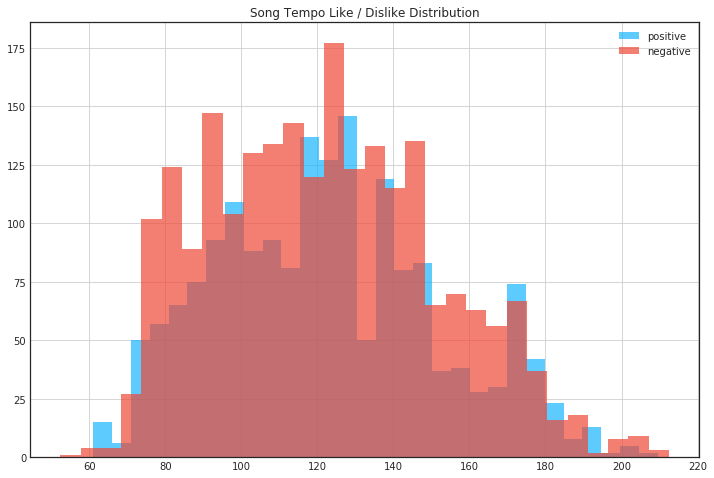

In [8]:
fig = plt.figure(figsize=(12,8))
plt.title("Song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha=0.7, bins=30, label='positive')
neg_tempo.hist(alpha=0.7, bins=30, label='negative')
plt.legend(loc='upper right')

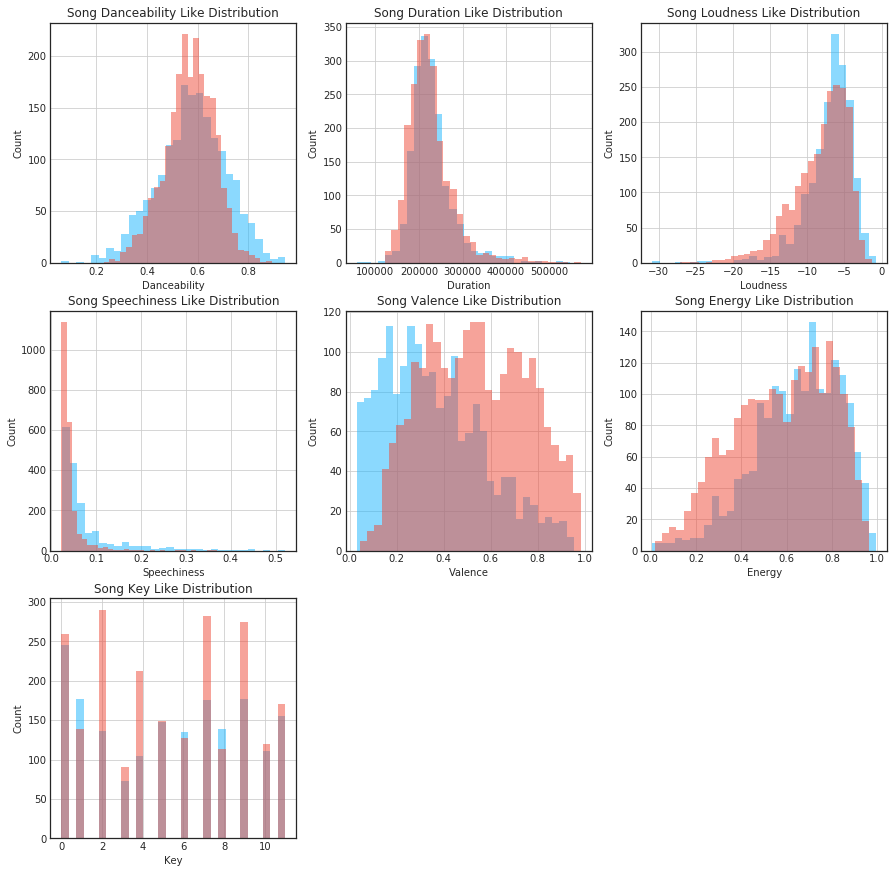

In [9]:
fig2 = plt.figure(figsize=(15,15))

#Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like Distribution')
pos_dance.hist(alpha= 0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha= 0.5, bins=30)

#Duration_ms
ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Duration')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration Like Distribution')
pos_duration.hist(alpha= 0.5, bins=30)
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha= 0.5, bins=30)

#Loudness
ax7 = fig2.add_subplot(333)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness Like Distribution')
pos_loudness.hist(alpha= 0.5, bins=30)
ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha= 0.5, bins=30)

#Speechiness
ax9 = fig2.add_subplot(334)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title('Song Speechiness Like Distribution')
pos_speechiness.hist(alpha= 0.5, bins=30)
ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha= 0.5, bins=30)

#Valence
ax11 = fig2.add_subplot(335)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title('Song Valence Like Distribution')
pos_valence.hist(alpha= 0.5, bins=30)
ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha= 0.5, bins=30)

#Energy
ax13 = fig2.add_subplot(336)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title('Song Energy Like Distribution')
pos_energy.hist(alpha= 0.5, bins=30)
ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha= 0.5, bins=30)

#Key
ax15 = fig2.add_subplot(337)
ax15.set_xlabel('Key')
ax15.set_ylabel('Count')
ax15.set_title('Song Key Like Distribution')
pos_key.hist(alpha= 0.5, bins=30)
ax16 = fig2.add_subplot(337)
neg_key.hist(alpha= 0.5, bins=30)

In [33]:
c = DecisionTreeClassifier(min_samples_split=100)

In [4]:
#define a set of features for the Decision Tree Classifier to use
features = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness","duration_ms"]

In [5]:
x_train = train[features]
y_train = train["target"]

x_test = test[features]
y_test = test["target"]

In [36]:
dt = c.fit(x_train, y_train)

In [37]:
def show_tree(InputTree, features, path):
    f = io.StringIO()
    tree.export_graphviz(InputTree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

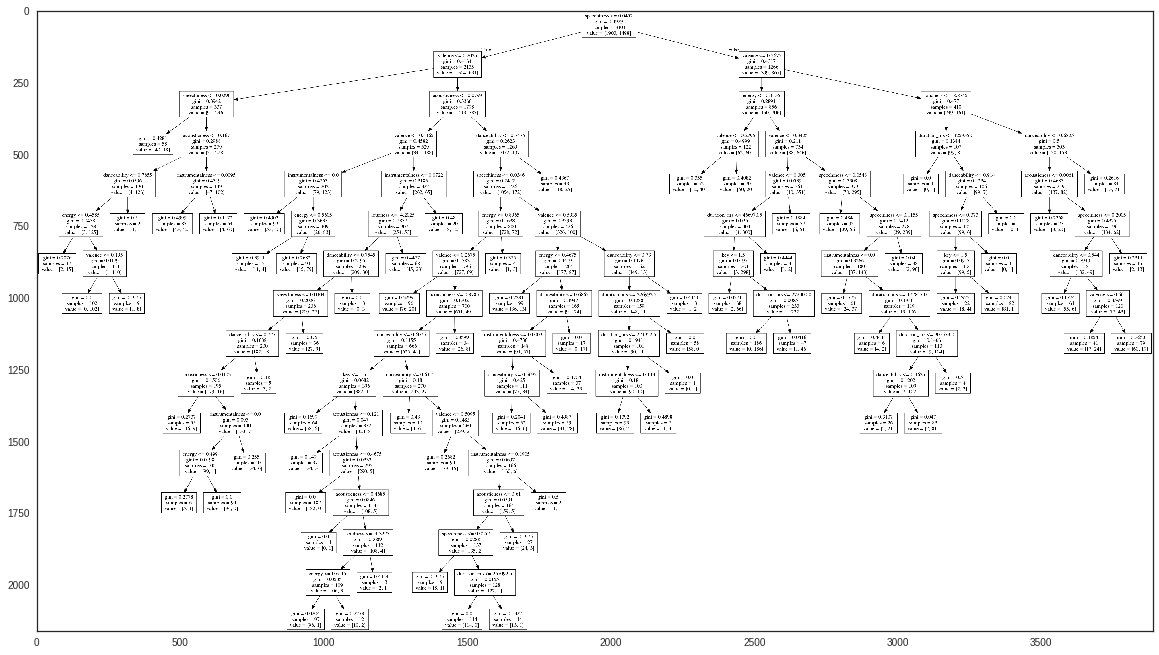

In [38]:
show_tree(dt, features, "dec_tree_01.png")

In [39]:
y_pred = c.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Decision Tree: ", round(score, 1), "%")

Accuracy using Decision Tree:  79.5 %


In [86]:
# test = pd.read_csv('data/data.csv')

# new_test_data = test[features]

# pred = c.predict(new_test_data)

# likedSongs = 0
# i = 0
# for prediction in pred:
#     if(prediction == 1):
#         print ("Song: " + test["song_title"][i] + ", By: "+ test["artist"][i])
#         likedSongs= likedSongs + 1
#     i = i +1
# print(likedSongs)

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3)

knn.fit(x_train, y_train)

knn_pred = c.predict(x_test)

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, knn_pred) * 100
print("Accuracy using Knn Tree: ", round(score, 1), "%")

Accuracy using Knn Tree:  79.5 %


In [87]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(x_train, y_train)

mlp_pred = mlp.predict(x_test)

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, mlp_pred) * 100
print("Accuracy using mlp Tree: ", round(score, 1), "%")

Accuracy using mlp Tree:  46.3 %


In [94]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)
qda_pred = qda.predict(x_test)
score = accuracy_score(y_test, qda_pred)*100
print("Accuracy using qda: ", round(score, 1), "%")

Accuracy using qda:  74.2 %


In [90]:
from sklearn.svm import SVC
svc_lin = SVC(kernel="linear", C=0.025)
svc_lin.fit(x_train, y_train)
svc_pred = svc_lin.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, svc_pred) * 100
print("Accuracy using svc linear: ", round(score, 1), "%")

Accuracy using svc linear:  53.9 %


In [91]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
gpc = GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True)
gpc.fit(x_train, y_train)
gpc_pred = gpc.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, gpc_pred) * 100
print("Accuracy using gpc: ", round(score, 1), "%")

Accuracy using gpc linear:  66.1 %


In [14]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
forest = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, forest_pred) * 100
print("Accuracy using random forest: ", round(score, 1), "%")
ada = AdaBoostClassifier(n_estimators=20)
ada.fit(x_train, y_train)
ada_pred = ada.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, ada_pred) * 100
print("Accuracy using ada: ", round(score, 1), "%")

Accuracy using random forest:  81.5 %
Accuracy using ada:  84.2 %


In [93]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(x_train, y_train)
gauss_pred = gauss.predict(x_test)
score = accuracy_score(y_test, gauss_pred)*100
print("Accuracy using gauss: ", round(score, 1), "%")

Accuracy using gauss:  57.7 %


In [11]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0)
k_means.fit(x_train, y_train)
predicted= k_means.predict(x_test)
score = accuracy_score(y_test, predicted)*100
print("Accuracy using Kmeans: ", round(score, 1), "%")

Accuracy using gauss:  45.3 %


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
predicted = gbc.predict(x_test)
score = accuracy_score(y_test, predicted)*100
print("Accuracy using Gbc: ", round(score, 1), "%")

Accuracy using Gbc:  85.0 %


In [17]:
import spotipy
import spotipy.util as util
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials 
from random import randint

cid ="0cadd882a6ab4ff485c80b8b02aa3b0c" 
secret = "04d0f737e18a4a92abee1da25d70766b" 
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False 
username = "1287242681"
scope = 'playlist-modify-private playlist-modify-public playlist-read-private user-library-read'
token = util.prompt_for_user_token(username, scope)
#Good Playlist
if token:
    sp = spotipy.Spotify(auth=token)

In [18]:
test = pd.read_csv('data/indie.csv')

new_test_data = test[features]

pred = gbc.predict(new_test_data)

likedSongs = 0
i = 0
for prediction in pred:
    if(prediction == 1):
        print ("Song: " + test["song_title"][i] + ", By: "+ test["artist"][i])
        sp.user_playlist_add_tracks("1287242681", "7eIX1zvtpZR3M3rYFVA7DF", [test['id'][i]])
        likedSongs= likedSongs + 1
    i = i +1
    

Song: stargazing (feat. Vancouver Sleep Clinic), By: gnash
Song: Get Home, By: R.O
Song: Made Of Something, By: bvd kult
Song: Make Me Feel Better (feat. Matt Van), By: Wistful
Song: I Hate U, I Love U / Rumours, By: Thoreau
Song: Now I Know, By: Dropstadamus
Song: Rain Check, By: Eventide
Song: Pilot, By: Impala
Song: No Sleep (TIFA Remix), By: Munchie Squad
Song: Circumstances, By: Nydge
Song: Love Somebody, By: Justin Caruso
Song: Wasted Youth, By: FLETCHER
Song: Coldhearted, By: Bryce Fox
Song: Closer, By: Steam Phunk
Song: Drowning, By: DELAY.
Song: Sonder, By: Jaron
Song: Blame Games, By: Tedy
Song: Walls, By: Madds
Song: Stories, By: Sam Berson
Song: Loveless, By: Finding Hope
Song: Do You Still Feel? (feat. MAX), By: Rain Man
Song: Rise, By: WE ARE FURY
Song: Off for the Night (OFTN), By: No Wyld


In [10]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)

lm.coef_
features = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness","duration_ms"]

coeff_of_features = []

for i in range(0,len(lm.coef_)):
    coeff_of_features.append([features[i], lm.coef_[i]])
    
coeff_of_features

[['danceability', 0.68331456079942177],
 ['loudness', 0.010472899673923411],
 ['valence', -0.95371512509148026],
 ['energy', 0.32304480236776767],
 ['instrumentalness', 0.50083708899117274],
 ['acousticness', -0.2164138783865745],
 ['key', 0.0016506034273676823],
 ['speechiness', 2.4504720352537377],
 ['duration_ms', -4.7908729777708441e-07]]

# Graph of Linear Regression Coeff of Features
![title](./CharacterisiticsLinearRegression.png)